In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
import time

# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars Facts site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

time.sleep(2)
html = browser.html
html_soup = soup(html, 'html.parser')

[WDM] - Downloading: 100%|█████████████████| 8.41M/8.41M [00:00<00:00, 24.0MB/s]


In [2]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
mars_df = df[0]
mars_df['terrestrial_date']= pd.to_datetime(mars_df['terrestrial_date'])
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [3]:
#How many months exist on Mars?
mars_df.max()
#12 months exist on Mars

id                                 1895
terrestrial_date    2018-02-27 00:00:00
sol                                1977
ls                                  359
month                                12
min_temp                          -62.0
pressure                          925.0
dtype: object

In [4]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
from datetime import date

d0 = date(2012, 8, 16)
d1 = date(2018, 2, 27)
delta = d1 - d0
print(delta.days)
#2021 days

2021


<AxesSubplot:xlabel='month'>

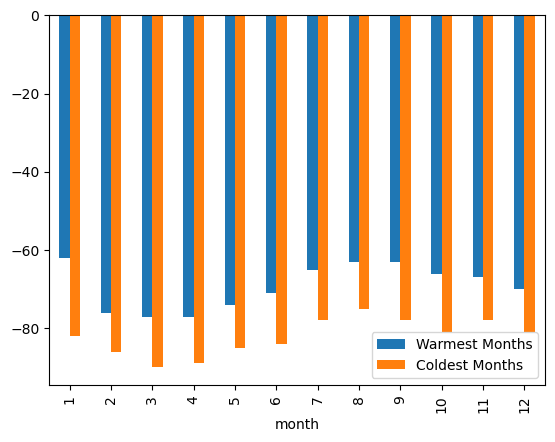

In [5]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
#Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

min_temp = mars_df.groupby(['month'])['min_temp'].min()
max_temp = mars_df.groupby(['month'])['min_temp'].max()
temp = {"Warmest Months":max_temp,
        "Coldest Months":min_temp
}
temp_df = pd.DataFrame(temp)
temp_df.to_csv('The coldest and the warmest months on Mars')
temp_df.plot.bar()


<AxesSubplot:xlabel='month'>

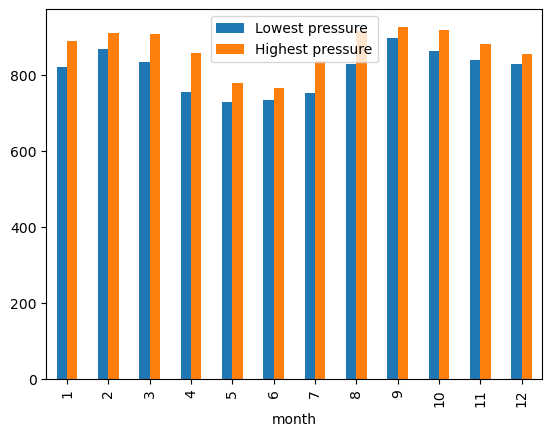

In [6]:
#Which months have the lowest and the highest atmospheric pressure on Mars? 
#Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart
min_pre = mars_df.groupby(['month'])['pressure'].min()
max_pre = mars_df.groupby(['month'])['pressure'].max()
pressure = {"Lowest pressure":min_pre,
               "Highest pressure":max_pre
    
}
pressure_df = pd.DataFrame(pressure)
pressure_df.to_csv('Lowest and Highest atmospheric pressure on Mars')
pressure_df.plot.bar()

<AxesSubplot:xlabel='month'>

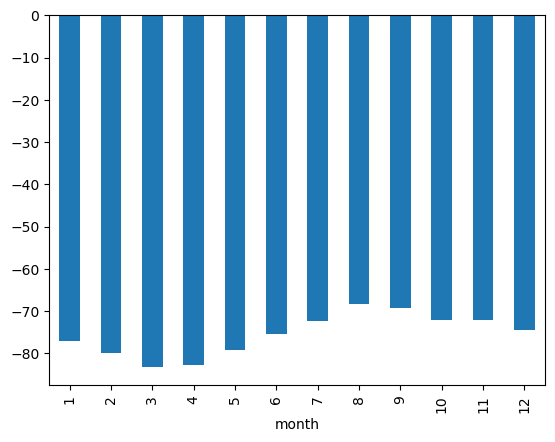

In [14]:
# About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
#Visually estimate the result by plotting the daily minimum temperature.
mon_mean = mars_df.groupby(['month'])['min_temp'].mean()
mon_mean.to_csv('Daily Minimum Tempearture')
mon_mean.plot.bar()




In [15]:
browser.quit()